In [1]:
from matplotlib import pyplot as plt
import os
from fidelity_simulation import FidelitySimulation
from pulse import RectangularReadoutPulse
from cycler import cycler
import matplotx

In [2]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['axes.prop_cycle'] = cycler(color=[ '#669bbc', '#60d394', '#ee6055',])

In [3]:
# current_path = os.path.abspath("")
# data_dir_path = os.path.join(current_path, "data")
# s_parameters_file_state_1 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_shifted_mock_156_kHz_cut.s2p",
# )
# s_parameters_file_state_0 = os.path.join(
#     data_dir_path,
#     "hfss_resonance_simulator_Resonator_7252612e-6GHz_2_ports_v12_cut.s2p"
# )
#
# shift_f = 156 * 10 ** 3
# f_state_0 = 7.2669 * 10 ** 9
# pulse_frequency = f_state_0 + shift_f / 2


In [4]:
current_path = os.path.abspath("")
data_dir_path = os.path.join(current_path, "data")
s_parameters_file_state_1 = os.path.join(
    data_dir_path,
    "data_00000_1_ghz.s2p",
)
s_parameters_file_state_0 = os.path.join(
    data_dir_path,
    "data_00000_0_ghz.s2p"
)

pulse_frequency = 6.065212860 * 10 ** 9

In [5]:
def run(pulse_samples_number):
    pulse_length = 2 * 10 ** (-6)
    total_signal_time = 2 * 10 ** (-6)

    print("simulation dt =", total_signal_time / pulse_samples_number * 10 ** 9, "ns")

    rect_readout_pulse = RectangularReadoutPulse(
        carrier_frequency=pulse_frequency,
        pulse_duration=pulse_length,
        pulse_power_dbm=-123,
        total_signal_time=total_signal_time,
        pulse_samples_number=pulse_samples_number,
    )

    rect_readout_pulse.plot_pulse()

    fidelity_simulation = FidelitySimulation(
        s_parameters_file_state_0=s_parameters_file_state_0,
        s_parameters_file_state_1=s_parameters_file_state_1,
        readout_pulse=rect_readout_pulse,
        IQ_projection_frequency=pulse_frequency + 200e6,  # f_fi = 200MHz
        num_iterations=50,
        readout_dt=1e-9,
        plot_pulses=True,
        plot_result=True,
        disable_progress_bar=False,
    )

    fidelity = fidelity_simulation.run()

    print("fidelity =", fidelity)


simulation dt = 0.0002384185791015625 ns


/Users/user/PycharmProjects/qubit_readout_simulation/fidelity_analysis/pulse.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


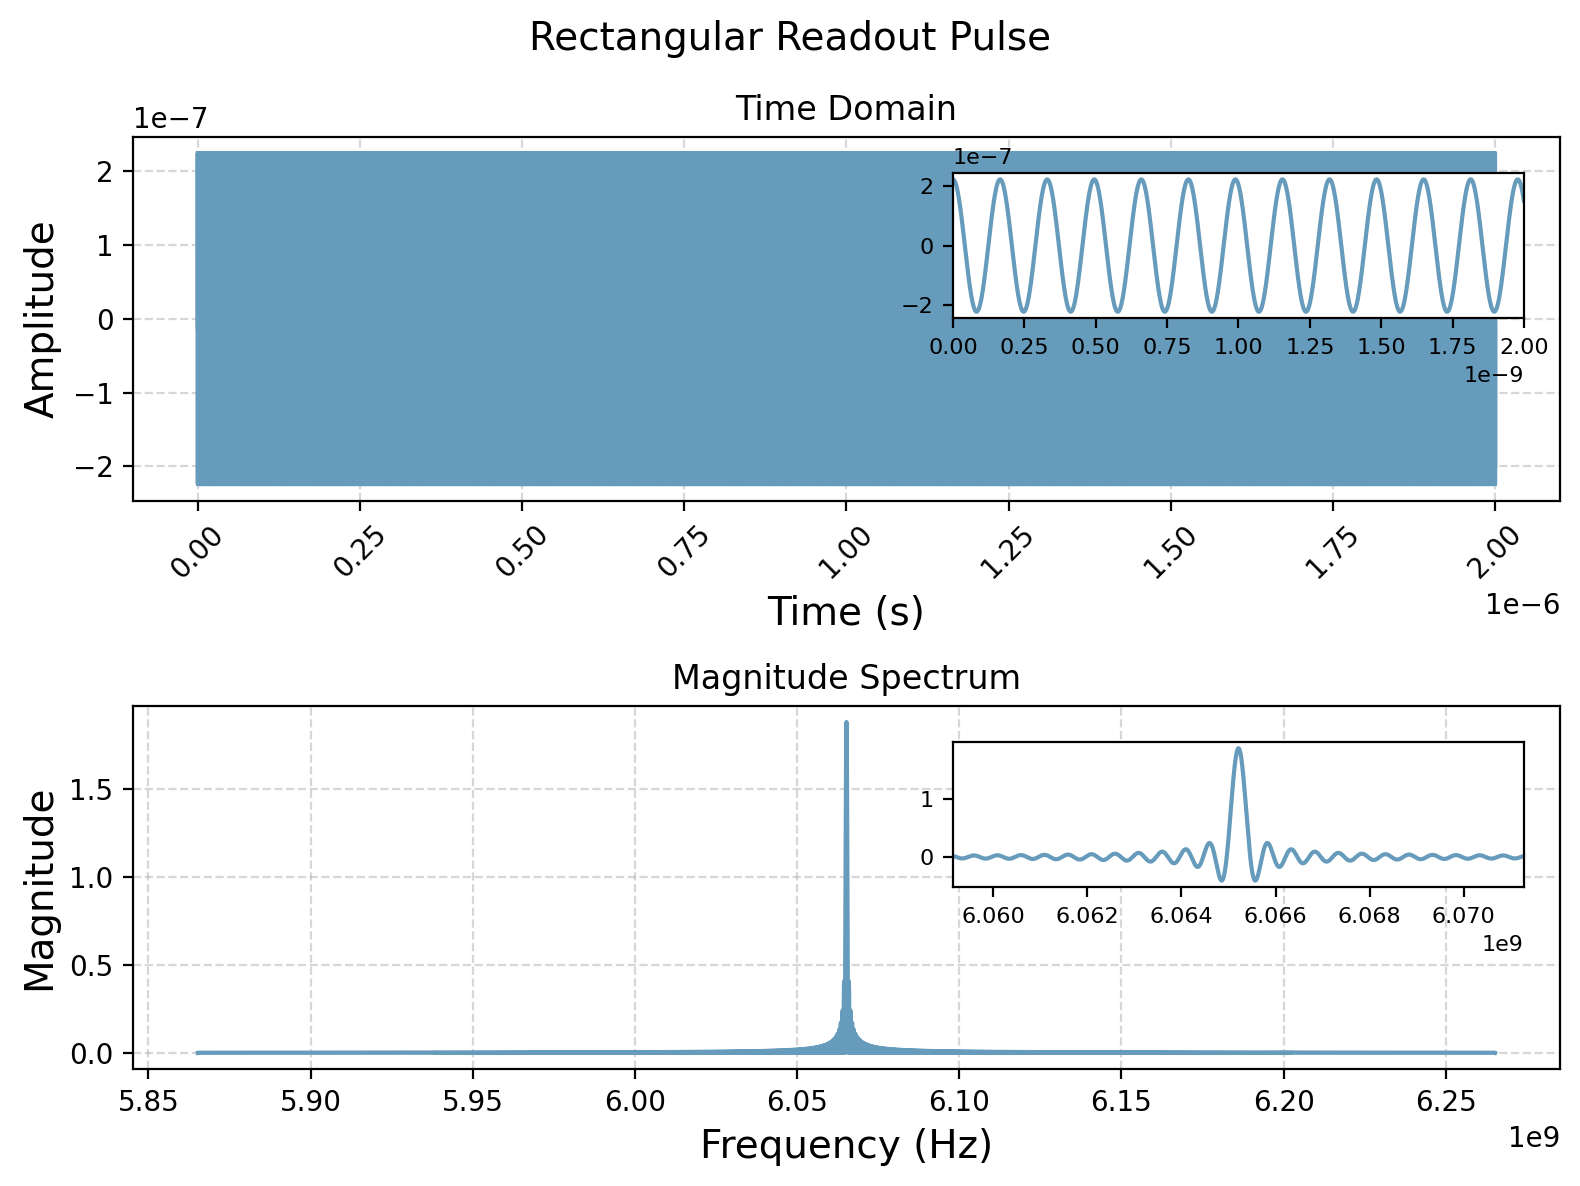

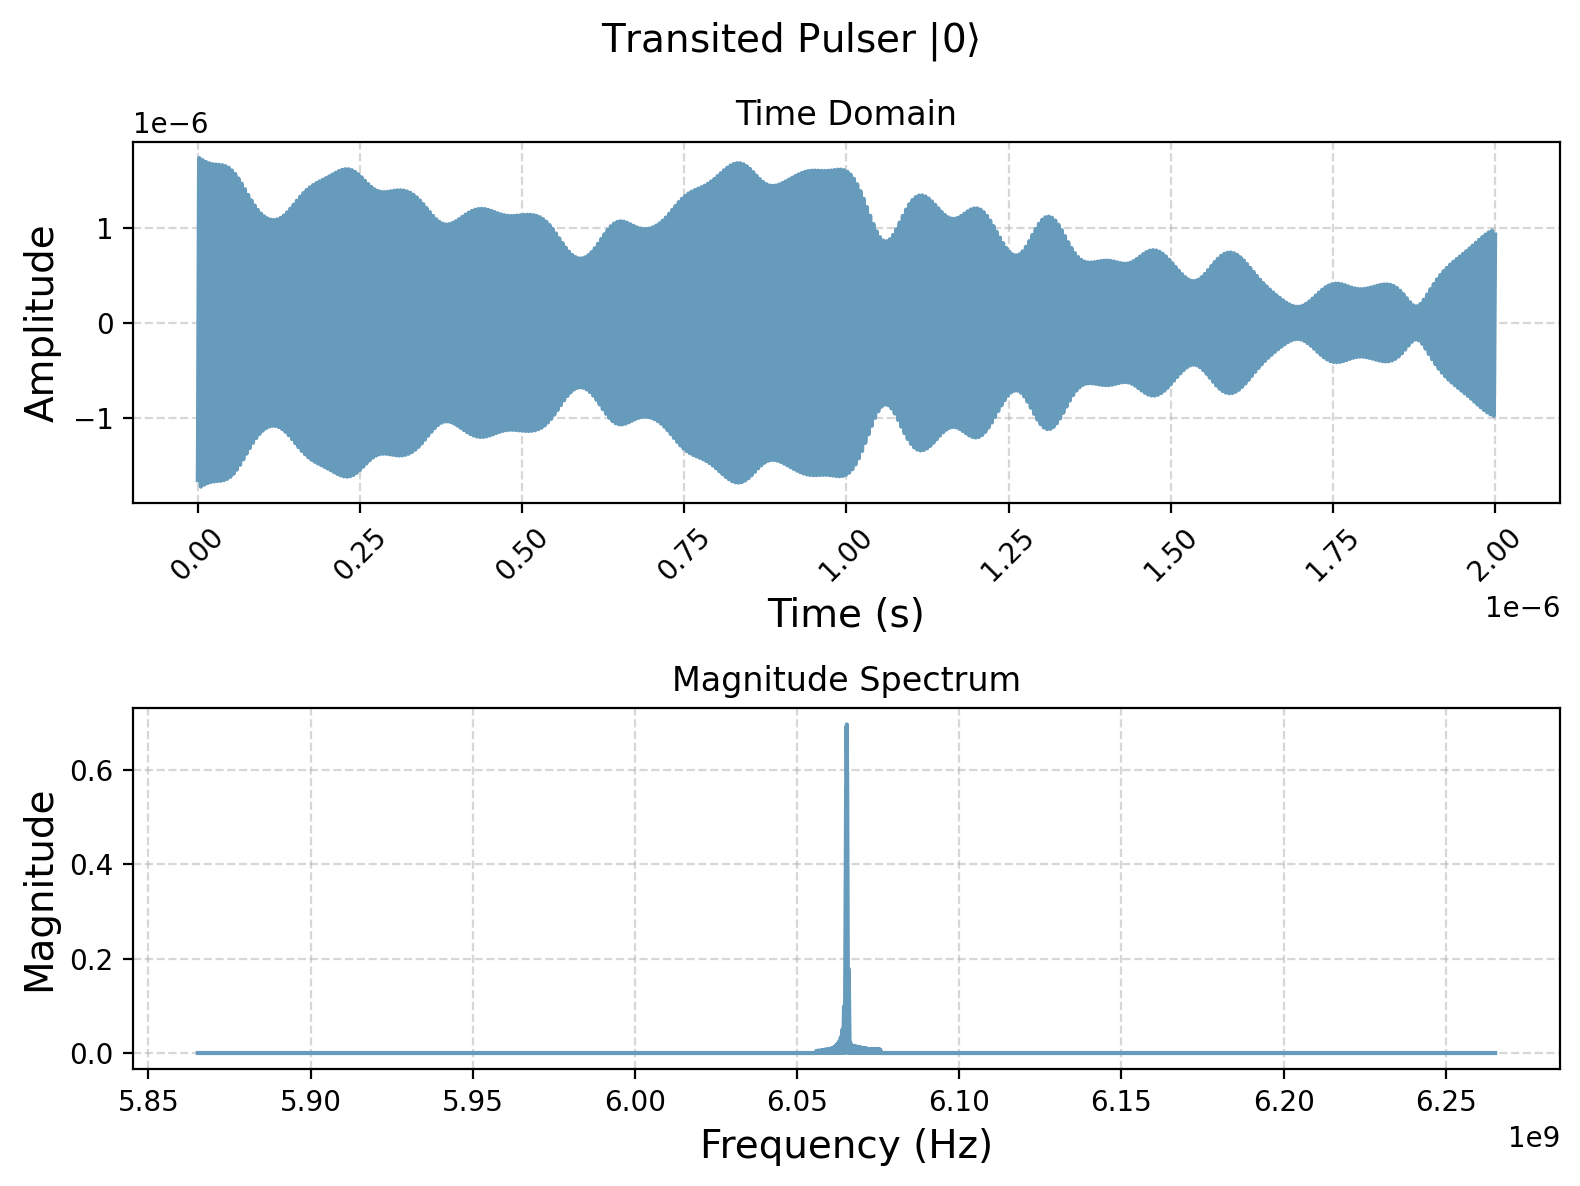

100%|██████████| 50/50 [00:12<00:00,  3.95it/s, Transited Pulser $|0\rangle$]


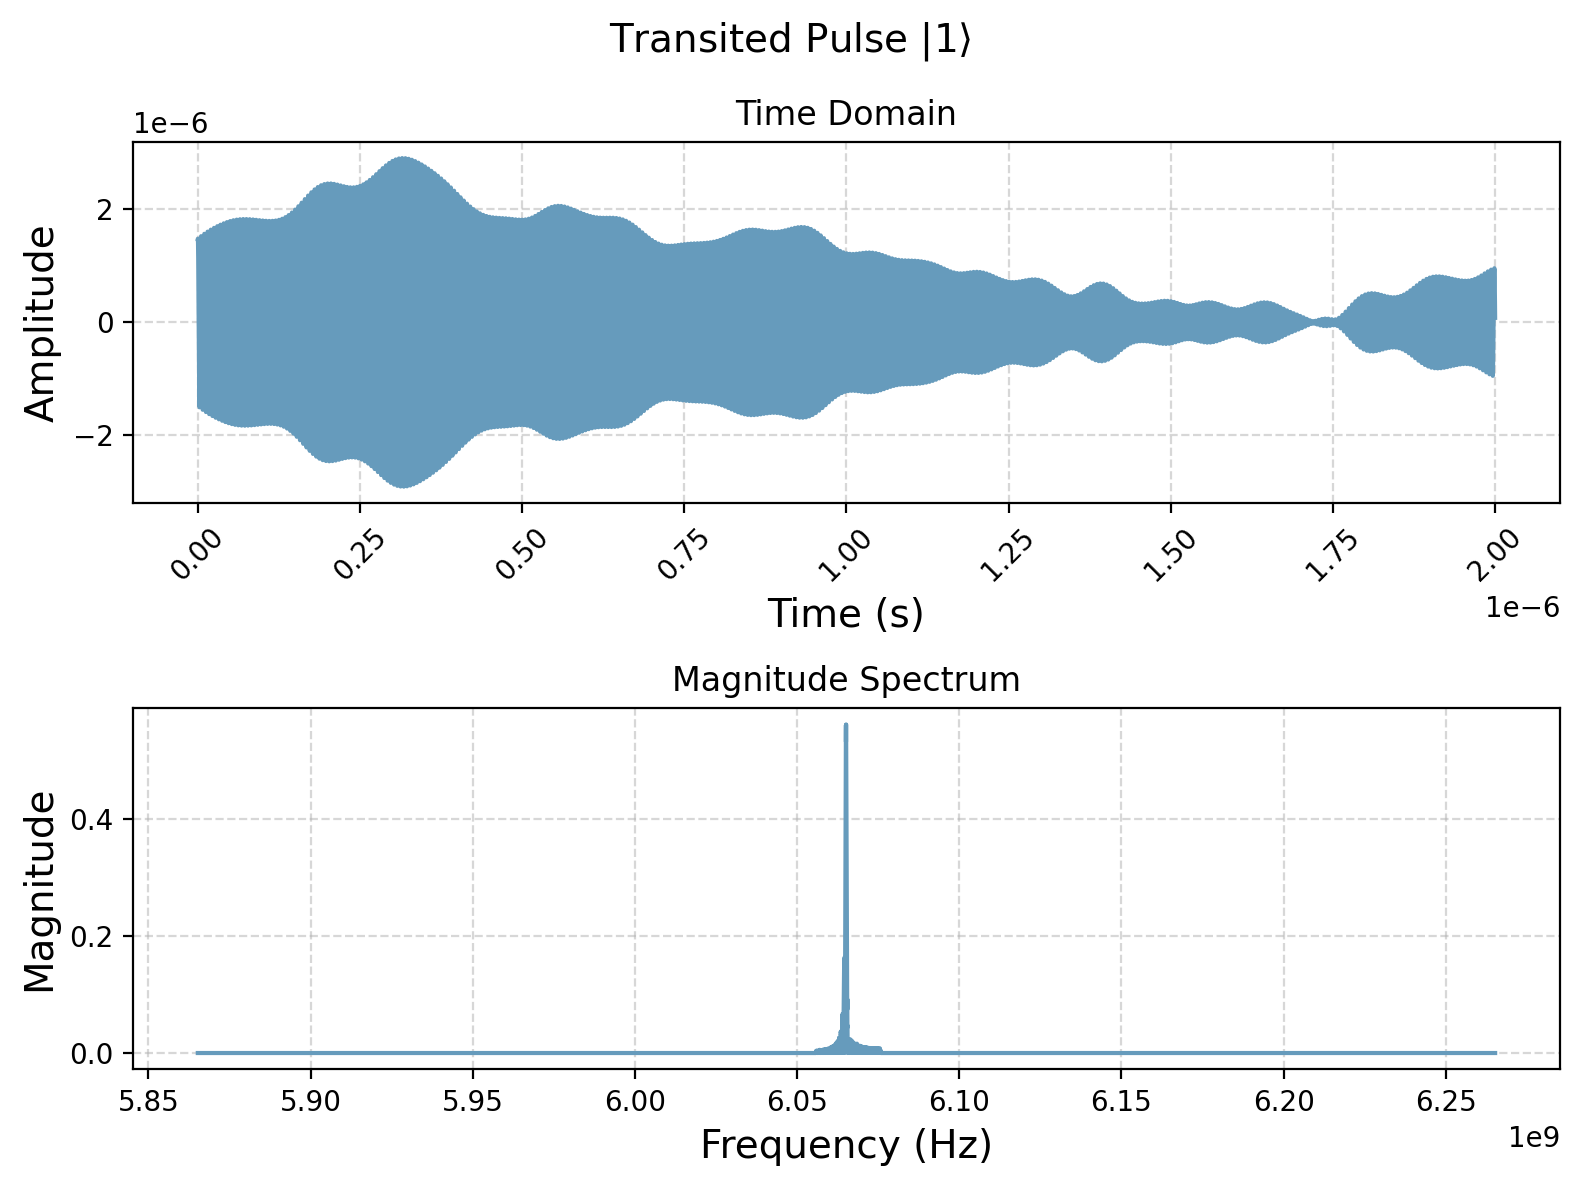

100%|██████████| 50/50 [00:08<00:00,  5.68it/s, Transited Pulse $|1\rangle$]


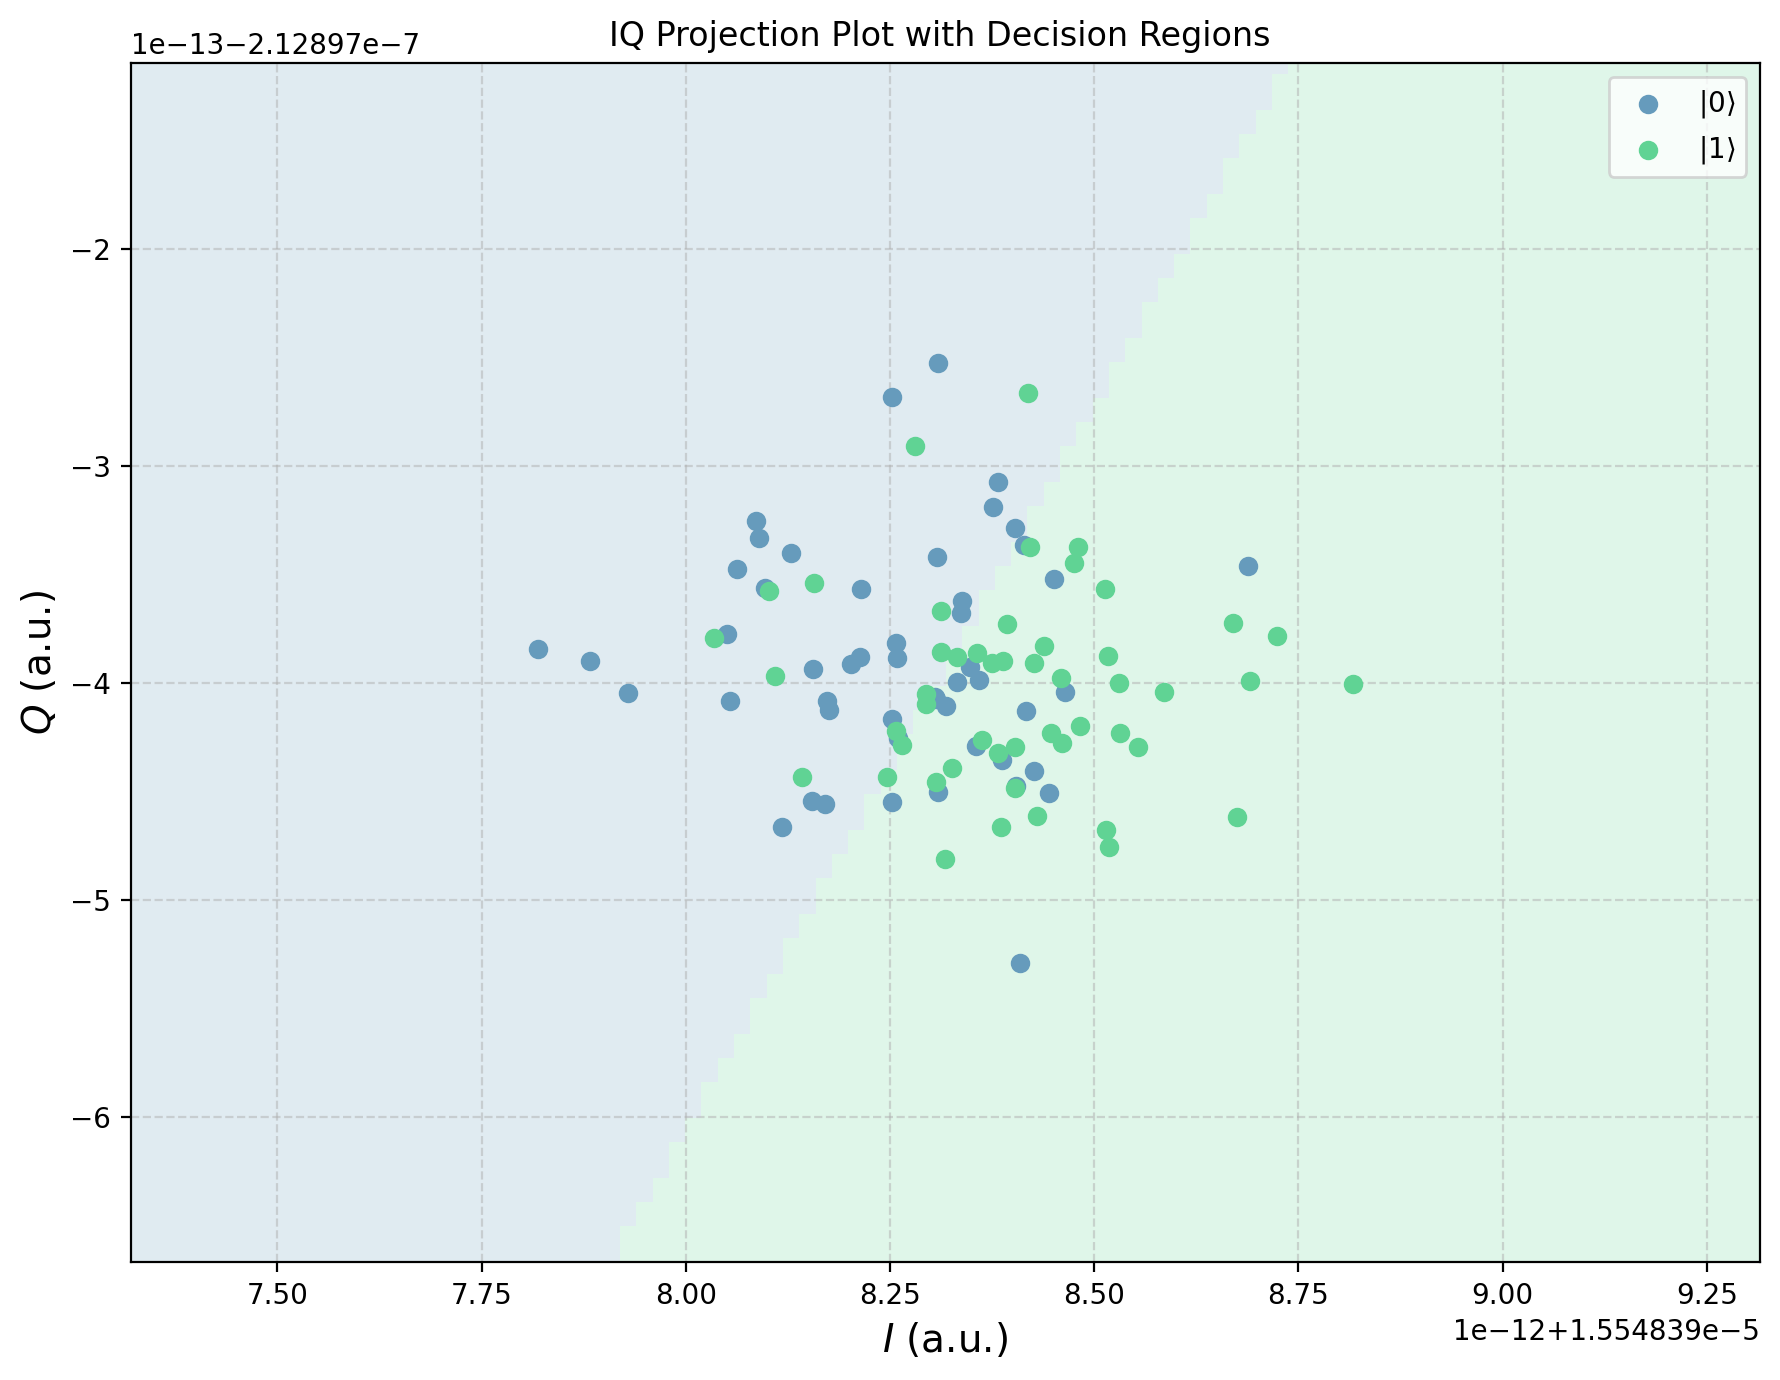

fidelity = 0.7
CPU times: user 10.1 s, sys: 2.78 s, total: 12.8 s
Wall time: 38.4 s


In [6]:
%%time
run(pulse_samples_number=2 ** 23)

In [7]:
plt.savefig("simple_fidelity_test.png")

<Figure size 1280x960 with 0 Axes>

/Users/user/PycharmProjects/wmiklayout/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/user/PycharmProjects/wmiklayout/venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


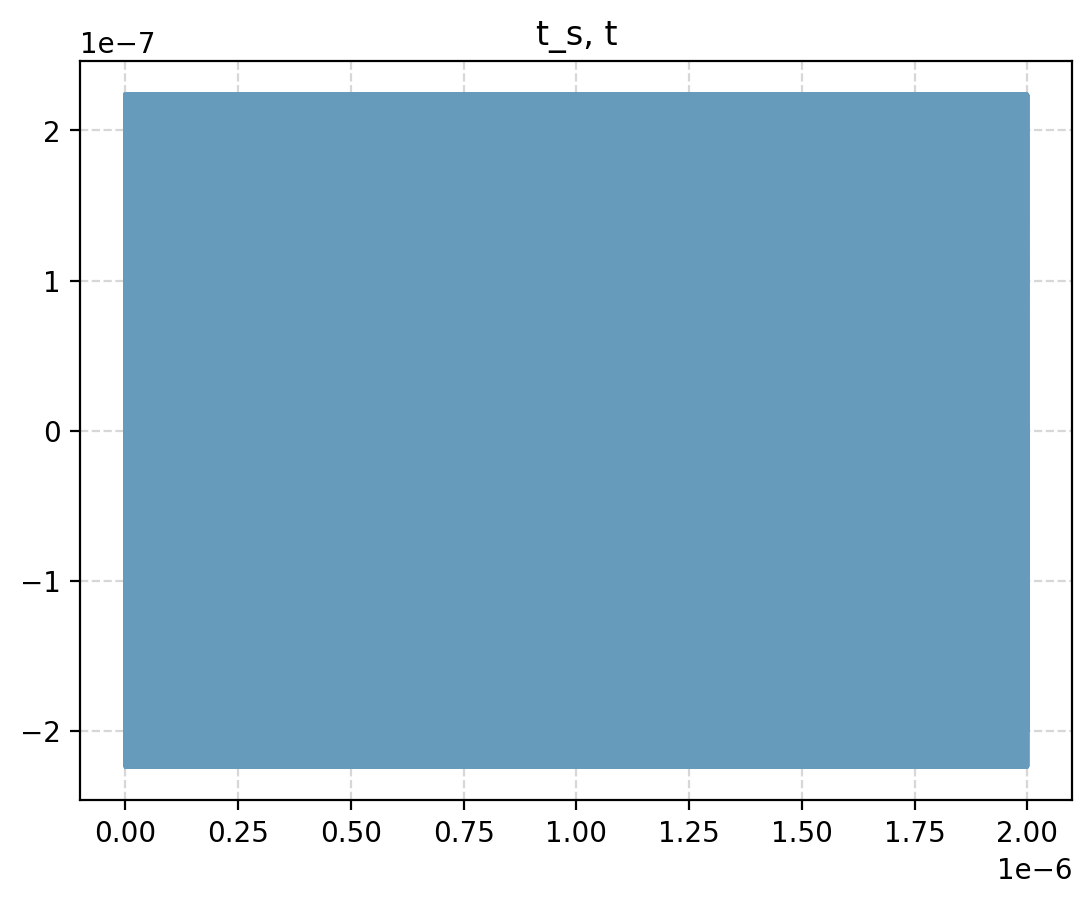

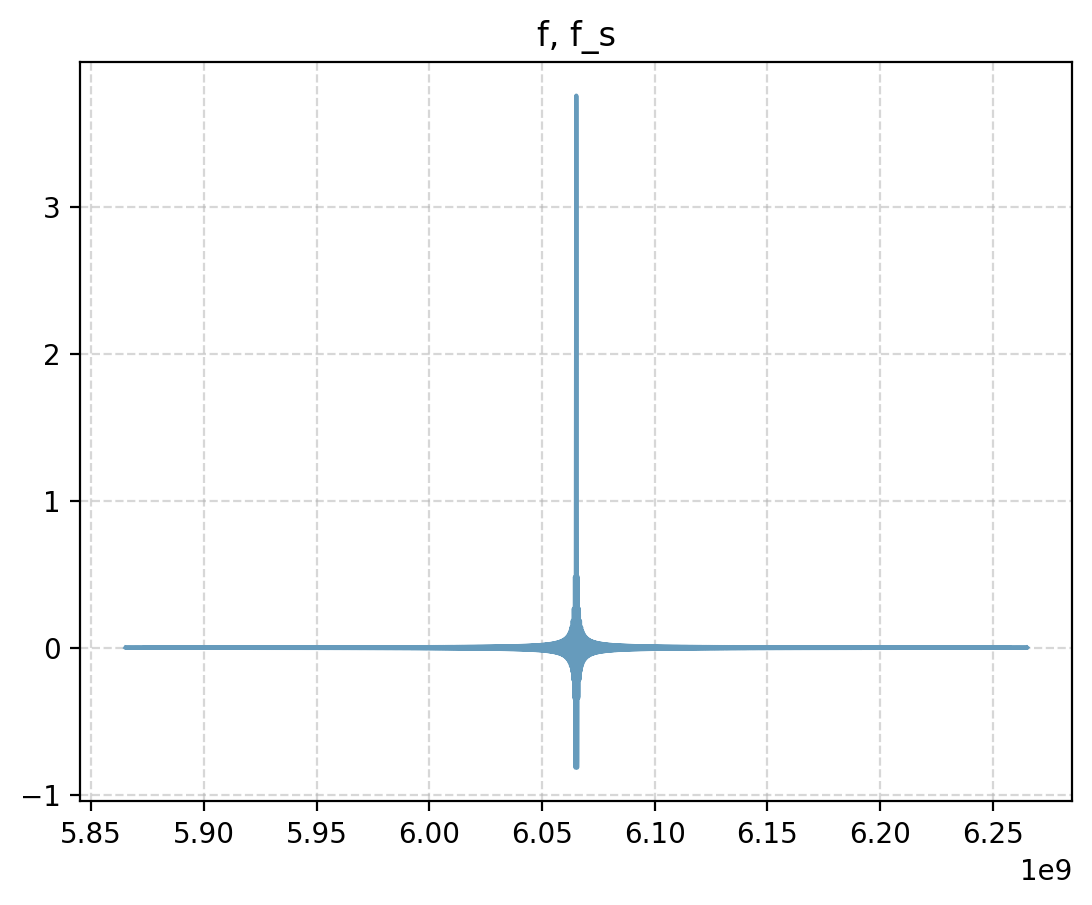

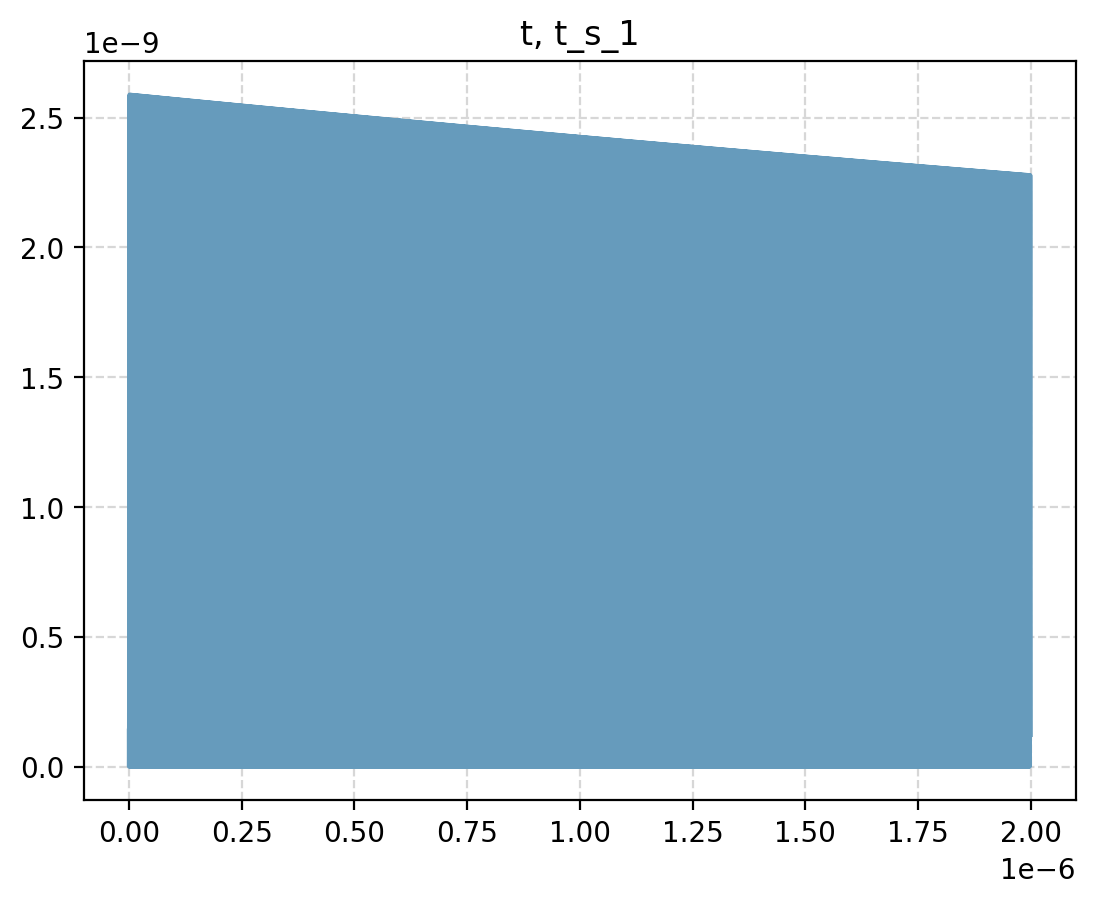

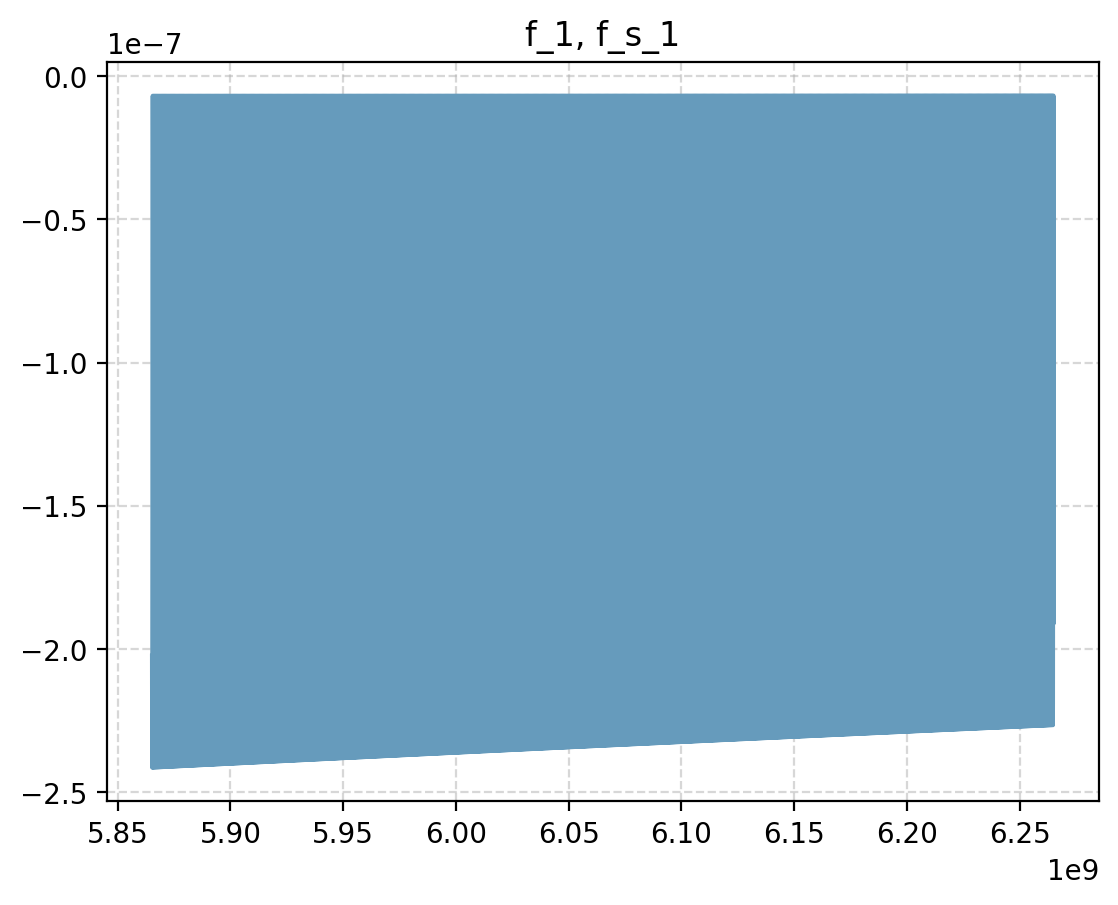

In [8]:
from fidelity_analysis.pulse import Pulse

pulse_length = 2 * 10 ** (-6)
total_signal_time = 2 * 10 ** (-6)
pulse_frequency = 6.065212860 * 10 ** 9


rect_readout_pulse = RectangularReadoutPulse(
    carrier_frequency=pulse_frequency,
    pulse_duration=pulse_length,
    pulse_power_dbm=-123,
    total_signal_time=total_signal_time,
    pulse_samples_number=2 ** 24,
)
t_s = rect_readout_pulse.t_signal
t = rect_readout_pulse.t_signal_times
dt = rect_readout_pulse.total_signal_time / rect_readout_pulse.pulse_samples_number

plt.title("t_s, t")
plt.plot(t, t_s)
plt.show()

f_s, f = Pulse.to_frequency_domain(time_signal=t_s,
                        dt=dt,
                        pulse_samples_number=rect_readout_pulse.pulse_samples_number,
                        frequencies_edges=rect_readout_pulse.frequencies_edges
                        )

plt.title("f, f_s")
plt.plot(f, f_s)
#plt.xlim(pulse_frequency*0.999, pulse_frequency*1.001)
plt.show()

t_s_1 = Pulse.to_time_domain(frequency_signal=f_s,
                                    dt=dt,
                                    pulse_samples_number=rect_readout_pulse.pulse_samples_number,
                                    frequencies_edges=rect_readout_pulse.frequencies_edges
                                    )

plt.title("t, t_s_1")
plt.plot(t, t_s_1)
plt.show()

f_s_1, f_1 = Pulse.to_frequency_domain(time_signal=t_s_1,
                        dt=dt,
                        pulse_samples_number=rect_readout_pulse.pulse_samples_number,
                        frequencies_edges=rect_readout_pulse.frequencies_edges
                        )
plt.title("f_1, f_s_1")
plt.plot(f_1, f_s_1)
#plt.xlim(pulse_frequency*0.999, pulse_frequency*1.001)
plt.show()

In [9]:
f[0]-f[1]

np.float64(-23.84185791015625)